In [2]:
from natasha import PER, NamesExtractor,MorphVocab,Segmenter, NewsEmbedding,NewsMorphTagger,NewsSyntaxParser,Doc,NewsNERTagger
from matplotlib import pyplot as plt
import numpy as np

In [26]:
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
morph_vocab = MorphVocab()

In [4]:
text_litr=open('chehov.txt','r',encoding='utf-8').readlines()[0]
text_tech=open('tech.txt','r',encoding='utf-8').readlines()[0]

# 1 общестатистические характеристики

### 1.1 общее число словоупотреблений

In [5]:
text='То вернувшийся и встревоженный муж искал по деревне свою жену. А с огородов слышался в это время несдерживаемый смех: жена забылась, опьянела и счастием нескольких часов старалась наверстать ожидавшую ее назавтра муку.'
doc = Doc(text_litr)

doc.segment(segmenter)
doc.tag_morph(morph_tagger)
n=0
for word in doc.tokens:
   if word.pos!='PUNCT':
       n+=1
print(f'Число словоупотреблений: {n}')

Число словоупотреблений: 2963


### 1.2 число различных словоформ

In [6]:
n=np.unique([token.text for token in doc.__dict__['tokens'] if token.pos!='PUNCT']).shape[0]
print(f'Число рзличных словоформ словоформ: {n}')

Число рзличных словоформ словоформ: 1628


### 1.3 средняя длина предложения (если процессор разбивает текст на предложения)

In [7]:
n=0
for sent in doc.sents:
   n+=sent.tokens.__len__()

print(f'Средняя длина предложений: {n/len(doc.sents):1f}')

Средняя длина предложений: 20.767568


# 2 Морфологические характеристики

### 2.1 абсолютная и относительная частота омонимичных словоформ

In [17]:
doc

Doc(text='В бытность мою в С—м уезде мне часто приходилось ..., tokens=[...], sents=[...])

### 2.2 процент разных частей речи

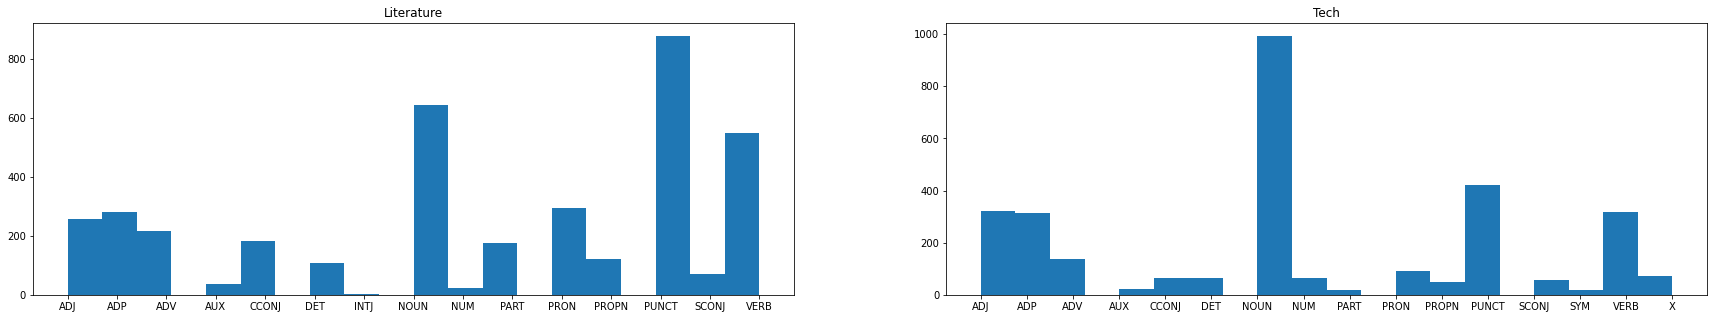

In [8]:
doc_litr = Doc(text_litr)
doc_litr.segment(segmenter)
doc_litr.tag_morph(morph_tagger)

doc_tech = Doc(text_tech)
doc_tech.segment(segmenter)
doc_tech.tag_morph(morph_tagger)

pos_litr=[]
for token in doc_litr.tokens:
    pos_litr.append(token.pos)

pos_tech=[]
for token in doc_tech.tokens:
    pos_tech.append(token.pos)

pos_litr.sort()
pos_tech.sort()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,5))
ax1.hist(pos_litr,bins=20)
ax1.set_title('Literature')
ax2.hist(pos_tech,bins=20)
ax2.set_title('Tech')
plt.show()

### 2.3 наиболее частотные падежи у существительных и прилагательных

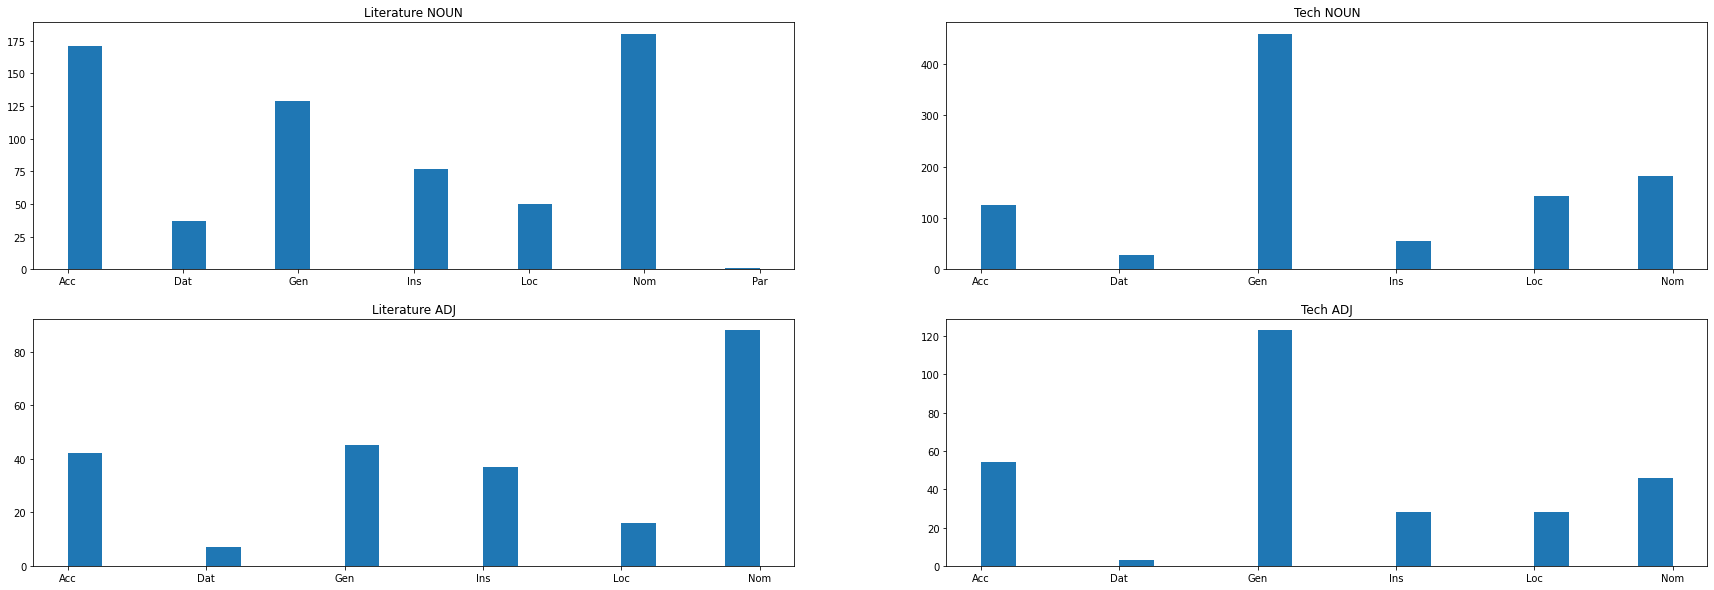

In [11]:
case_litr_noun=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='NOUN':
            case=token.feats.get('Case')
            if case is not None:
                case_litr_noun.append(case)

case_tech_noun=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='NOUN':
            case=token.feats.get('Case')
            if case is not None:
                case_tech_noun.append(case)

case_litr_adj=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='ADJ':
            case=token.feats.get('Case')
            if case is not None:
                case_litr_adj.append(case)

case_tech_adj=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='ADJ':
            case=token.feats.get('Case')
            if case is not None:
                case_tech_adj.append(case)

case_litr_noun=np.sort(case_litr_noun)
case_tech_noun=np.sort(case_tech_noun)

case_litr_adj=np.sort(case_litr_adj)
case_tech_adj=np.sort(case_tech_adj)

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(30,10))
axes[0,0].hist(case_litr_noun,bins=20)
axes[0,0].set_title('Literature NOUN')
axes[0,1].hist(case_tech_noun,bins=20)
axes[0,1].set_title('Tech NOUN')
axes[1,0].hist(case_litr_adj,bins=20)
axes[1,0].set_title('Literature ADJ')
axes[1,1].hist(case_tech_adj,bins=20)
axes[1,1].set_title('Tech ADJ')

plt.show()

### 2.4 относительную частоту падежей

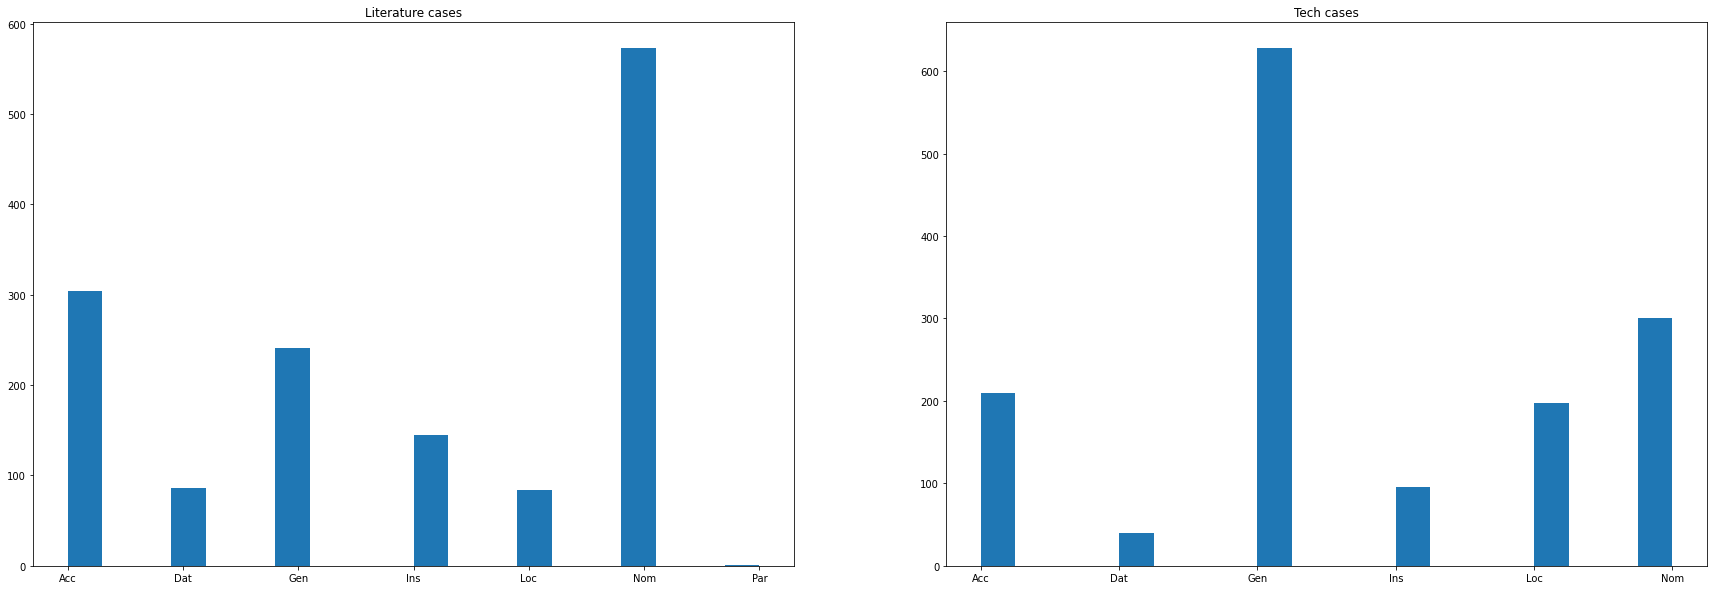

In [12]:
case_litr=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
            case=token.feats.get('Case')
            if case is not None:
                case_litr.append(case)

case_tech=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
            case=token.feats.get('Case')
            if case is not None:
                case_tech.append(case)

case_litr=np.sort(case_litr)
case_tech=np.sort(case_tech)


fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(30,10))
axes[0].hist(case_litr,bins=20)
axes[0].set_title('Literature cases')
axes[1].hist(case_tech,bins=20)
axes[1].set_title('Tech cases')

plt.show()

### 2.5 наиболее частотные морфологические формы глаголов (время/лицо/число)

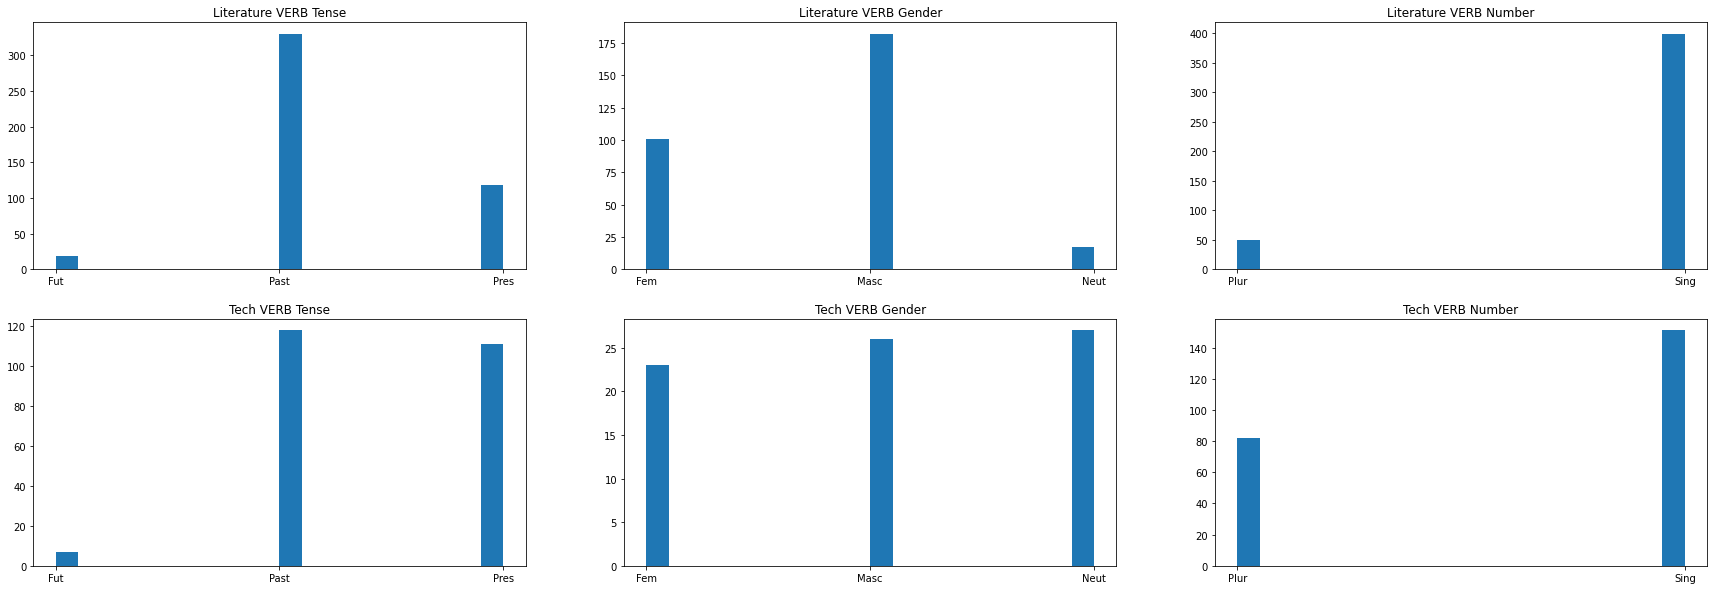

In [13]:
time_litr=[]
gender_litr=[]
number_litr=[]

for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='VERB':
            time=token.feats.get('Tense')
            gender=token.feats.get('Gender')
            number=token.feats.get('Number')
            if time is not None:
                time_litr.append(time)
            if gender is not None:
                gender_litr.append(gender)
            if number is not None:
                number_litr.append(number)

time_tech=[]
gender_tech=[]
number_tech=[]

for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='VERB':
            time=token.feats.get('Tense')
            gender=token.feats.get('Gender')
            number=token.feats.get('Number')
            if time is not None:
                time_tech.append(time)
            if gender is not None:
                gender_tech.append(gender)
            if number is not None:
                number_tech.append(number)

time_litr.sort()
gender_litr.sort()
number_litr.sort()

time_tech.sort()
gender_tech.sort()
number_tech.sort()


fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(30,10))
axes[0,0].hist(time_litr,bins=20)
axes[0,0].set_title('Literature VERB Tense')
axes[0,1].hist(gender_litr,bins=20)
axes[0,1].set_title('Literature VERB Gender')
axes[0,2].hist(number_litr,bins=20)
axes[0,2].set_title('Literature VERB Number')

axes[1,0].hist(time_tech,bins=20)
axes[1,0].set_title('Tech VERB Tense')
axes[1,1].hist(gender_tech,bins=20)
axes[1,1].set_title('Tech VERB Gender')
axes[1,2].hist(number_tech,bins=20)
axes[1,2].set_title('Tech VERB Number')


plt.show()

# 3 лексические характеристики

### 3.1 количество уникальных лемм

In [41]:
for token in doc_litr.tokens:
    token.lemmatize(morph_vocab)

for token in doc_tech.tokens:
    token.lemmatize(morph_vocab)

lemmas_litr=[]
lemmas_tech=[]

for token in doc_litr.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_litr.append(lemma)

for token in doc_tech.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_tech.append(lemma)

print(f'Уникальных лемм в литературном тексте = {np.unique(lemmas_litr).shape[0]} шт')
print(f'Уникальных лемм в техническом тексте = {np.unique(lemmas_tech).shape[0]} шт ')

Уникальных лемм в литературном тексте = 1171 шт
Уникальных лемм в техническом тексте = 800 шт 


### 3.2 число уникальных лемм разных частей речи (существительных, глаголов и др.)

### 3.3 число незнакомых слов

### 3.4 самые частотные слова и их относительная частота

### 3.5 самые частотные слова основных частей речи (существительные, прилагательные, наречия, глаголы)

### 3.6 коэффициент лексического богатства текста (=отношение числа различных лемм к общему числу словоупотреблений)